In [1]:
#   this jhu data extract is based on the tutorial by B Chen which can be found at the following link
#   https://towardsdatascience.com/covid-19-data-processing-58aaa3663f6 
#   the jhu data extract uses the following jhu csv files:
#   1  time_series_covid19_confirmed_global.csv................confirmed global Covid_19 cases
#   2  time_series_covid19_deaths_global.csv...................confirmed global Covid_19 deaths
#   3  time_series_covid19_recovered_global.csv................confirmed global Covid_19 recovered

#   import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from urllib.error import HTTPError
import numpy as np
import wget
import time
from datetime import datetime


# url of the raw csv dataset
urls = [
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
]
[wget.download(url) for url in urls]



['time_series_covid19_confirmed_global (1).csv',
 'time_series_covid19_deaths_global (1).csv',
 'time_series_covid19_recovered_global (1).csv']

In [2]:
#   create dataframes from csv's

confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
    
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
    
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')

confirmed_df


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,157878,157887,157895,157951,157967,157998,158037,158056,158084,158107
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,206935,207221,207542,207709,207709,208352,208899,208899,210224,210224
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,215723,216098,216376,216637,216930,217265,217647,218037,218432,218818
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,21571,21730,21730,21730,22332,22540,22823,23122,23740,23740
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,68362,70221,71142,71752,71752,76787,78475,79871,81593,82398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,1604712,1620869,1636455,1651673,1666545,1680985,1694874,1714742,1731257,1746092
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,467682,467682,467682,467682,468619,469452,469748,469748,469748,469748
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,10105,10109,10111,10115,10118,10123,10125,10126,10126,10127
278,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,225260,228932,231581,233120,234476,238383,243638,249193,254274,257948


In [3]:
deaths_df


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7346,7348,7349,7354,7354,7355,7356,7356,7356,7356
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3181,3187,3189,3194,3194,3207,3212,3212,3217,3217
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6213,6222,6229,6238,6246,6254,6263,6271,6276,6284
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,139,139,139,139,139,140,140,140,140,140
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1743,1746,1746,1749,1749,1756,1760,1764,1770,1772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,30531,30766,31007,31214,31418,31632,31877,32168,32394,32610
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,4884,4884,4884,4884,4907,4912,4919,4919,4919,4919
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1981,1982,1983,1983,1984,1984,1984,1984,1984,1984
278,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,3688,3691,3697,3702,3709,3716,3726,3730,3734,3740


In [4]:
recovered_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#   use melt() to unpivot DataFrames from current wide format into long format

dates = confirmed_df.columns[4:]
confirmed_df_long = confirmed_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Confirmed'
)
deaths_df_long = deaths_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Deaths'
)
recovered_df_long = recovered_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Recovered'
)
confirmed_df_long

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
199075,NaN,Vietnam,14.058324,108.277199,1/1/22,1746092
199076,NaN,West Bank and Gaza,31.952200,35.233200,1/1/22,469748
199077,NaN,Yemen,15.552727,48.516388,1/1/22,10127
199078,NaN,Zambia,-13.133897,27.849332,1/1/22,257948


In [6]:
deaths_df_long

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
199075,NaN,Vietnam,14.058324,108.277199,1/1/22,32610
199076,NaN,West Bank and Gaza,31.952200,35.233200,1/1/22,4919
199077,NaN,Yemen,15.552727,48.516388,1/1/22,1984
199078,NaN,Zambia,-13.133897,27.849332,1/1/22,3740


In [7]:
recovered_df_long

,Province/State,Country/Region,Lat,Long,Date,Recovered
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
188410,NaN,Vietnam,14.058324,108.277199,1/1/22,0
188411,NaN,West Bank and Gaza,31.952200,35.233200,1/1/22,0
188412,NaN,Yemen,15.552727,48.516388,1/1/22,0
188413,NaN,Zambia,-13.133897,27.849332,1/1/22,0


In [8]:
#   remove recovered data for Canada due to mismatch issue
#   Canada recovered data is counted by Country-wise rather than Province/State-wise

recovered_df_long = recovered_df_long[recovered_df_long['Country/Region']!='Canada']


In [9]:
#    merge confirmed_df_long and deaths_df_long

full_table = confirmed_df_long.merge(
  right=deaths_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)
#    merge full_table and recovered_df_long

full_table = full_table.merge(
  right=recovered_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)
full_table

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0,0,0.0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0.0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0.0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0.0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0.0
...,...,...,...,...,...,...,...,...
199075,NaN,Vietnam,14.058324,108.277199,1/1/22,1746092,32610,0.0
199076,NaN,West Bank and Gaza,31.952200,35.233200,1/1/22,469748,4919,0.0
199077,NaN,Yemen,15.552727,48.516388,1/1/22,10127,1984,0.0
199078,NaN,Zambia,-13.133897,27.849332,1/1/22,257948,3740,0.0


In [10]:
#   data cleansing
#   1 converting date from string to datetime
#   2 replacing missing value NaN
#   3 coronavirus cases reported from 3 cruise ships should be treated differently

#   1 converting date from string to datetime
full_table['Date'] = pd.to_datetime(full_table['Date'])


In [11]:
full_table

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0.0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0.0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0.0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0.0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0.0
...,...,...,...,...,...,...,...,...
199075,NaN,Vietnam,14.058324,108.277199,2022-01-01,1746092,32610,0.0
199076,NaN,West Bank and Gaza,31.952200,35.233200,2022-01-01,469748,4919,0.0
199077,NaN,Yemen,15.552727,48.516388,2022-01-01,10127,1984,0.0
199078,NaN,Zambia,-13.133897,27.849332,2022-01-01,257948,3740,0.0


In [12]:
#   2 replacing missing values NaN
#   detect missing values NaN 
full_table.isna().sum()

Province/State    137223
Country/Region         0
Lat                 1422
Long                1422
Date                   0
Confirmed              0
Deaths                 0
Recovered          14931
dtype: int64

In [13]:
#   replace 'recovered' Nans with zero

full_table['Recovered'] = full_table['Recovered'].fillna(0)
full_table['Recovered']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
199075    0.0
199076    0.0
199077    0.0
199078    0.0
199079    0.0
Name: Recovered, Length: 199080, dtype: float64

In [14]:
#   3 coronavirus cases reported from 3 cruise ships should be treated differently
#   cases reported from cruise ships: Grand Princess, Diamond Princess and MS Zaandam need to be extracted and
#   treated differently due to Province/State and Country/Region mismatch over time

#   extract data for these ships 
ship_rows = full_table['Province/State'].str.contains('Grand Princess') | full_table['Province/State'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('MS Zaandam')
full_ship = full_table[ship_rows]

#   remove data for these ships 
full_table = full_table[~(ship_rows)]

In [15]:
#    calculate active cases = confirmed - deaths - recovered

full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']
full_table

C:\Users\mikem\AppData\Local\Temp/ipykernel_2676/2677385167.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0.0,0.0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0.0,0.0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0.0,0.0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0.0,0.0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
199075,NaN,Vietnam,14.058324,108.277199,2022-01-01,1746092,32610,0.0,1713482.0
199076,NaN,West Bank and Gaza,31.952200,35.233200,2022-01-01,469748,4919,0.0,464829.0
199077,NaN,Yemen,15.552727,48.516388,2022-01-01,10127,1984,0.0,8143.0
199078,NaN,Zambia,-13.133897,27.849332,2022-01-01,257948,3740,0.0,254208.0


In [16]:
#   aggregate data into Country/Region and group by Date and Country/Region

full_grouped = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
full_grouped

C:\Users\mikem\AppData\Local\Temp/ipykernel_2676/2747540925.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  full_grouped = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()


,Date,Country/Region,Confirmed,Deaths,Recovered,Active
0,2020-01-22,Afghanistan,0,0,0.0,0.0
1,2020-01-22,Albania,0,0,0.0,0.0
2,2020-01-22,Algeria,0,0,0.0,0.0
3,2020-01-22,Andorra,0,0,0.0,0.0
4,2020-01-22,Angola,0,0,0.0,0.0
...,...,...,...,...,...,...
137929,2022-01-01,Vietnam,1746092,32610,0.0,1713482.0
137930,2022-01-01,West Bank and Gaza,469748,4919,0.0,464829.0
137931,2022-01-01,Yemen,10127,1984,0.0,8143.0
137932,2022-01-01,Zambia,257948,3740,0.0,254208.0


In [17]:
#   calculate daily New cases, New deaths and New recovered by deducting the corresponding accumulative data on the previous day

#   new cases 
temp = full_grouped.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()
mask = temp['Country/Region'] != temp['Country/Region'].shift(1)
temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan

#   renaming columns
temp.columns = ['Country/Region', 'Date', 'New cases', 'New deaths', 'New recovered']

#   merging new values
full_grouped = pd.merge(full_grouped, temp, on=['Country/Region', 'Date'])

#   filling na with 0
full_grouped = full_grouped.fillna(0)

#   fixing data types
cols = ['New cases', 'New deaths', 'New recovered']
full_grouped[cols] = full_grouped[cols].astype('int')

full_grouped['New cases'] = full_grouped['New cases'].apply(lambda x: 0 if x<0 else x)


C:\Users\mikem\AppData\Local\Temp/ipykernel_2676/1381019722.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = full_grouped.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']


In [18]:
#   final output is Country-wise data with: -
#   Confirmed, Deaths, Recovered and Active are cumulative data
#   New cases, New deaths and New Recovered are daily data
#   the DataFrame is ordered by Date and Country/Region
full_grouped

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
137929,2022-01-01,Vietnam,1746092,32610,0.0,1713482.0,14835,216,0
137930,2022-01-01,West Bank and Gaza,469748,4919,0.0,464829.0,0,0,0
137931,2022-01-01,Yemen,10127,1984,0.0,8143.0,1,0,0
137932,2022-01-01,Zambia,257948,3740,0.0,254208.0,3674,6,0


In [19]:
#   convert dataframe to a csv file for backup
full_grouped.to_csv('COVID-19-time-series-full-grouped.csv')


In [20]:
#   select Oz to check data
full_grouped_oz = full_grouped.loc[full_grouped["Country/Region"] == "Australia"]
full_grouped_oz


,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
8,2020-01-22,Australia,0,0,0.0,0.0,0,0,0
202,2020-01-23,Australia,0,0,0.0,0.0,0,0,0
396,2020-01-24,Australia,0,0,0.0,0.0,0,0,0
590,2020-01-25,Australia,0,0,0.0,0.0,0,0,0
784,2020-01-26,Australia,4,0,0.0,4.0,4,0,0
...,...,...,...,...,...,...,...,...,...
136972,2021-12-28,Australia,339953,2210,0.0,337743.0,17678,8,0
137166,2021-12-29,Australia,361322,2224,0.0,359098.0,21369,14,0
137360,2021-12-30,Australia,368596,2233,0.0,366363.0,7274,9,0
137554,2021-12-31,Australia,402949,2248,0.0,400701.0,34353,15,0


In [21]:
#   read the vaccination dataset - csv file into a dataframe
vacc_data_df = pd.read_csv('vaccine_data_global.csv')
vacc_data_df

,Province_State,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
0,NaN,Afghanistan,12/16/2021,5.228706e+06,4.397449e+06,3.566192e+06,12/16/2021,4.0
1,NaN,Albania,12/16/2021,2.216402e+06,1.108572e+06,9.983260e+05,12/16/2021,8.0
2,NaN,Algeria,12/16/2021,1.229306e+07,6.875003e+06,5.391232e+06,12/16/2021,12.0
3,NaN,Andorra,12/16/2021,1.064280e+05,5.609500e+04,5.033300e+04,12/16/2021,20.0
4,NaN,Angola,12/16/2021,1.031955e+07,7.003795e+06,3.315757e+06,12/16/2021,24.0
...,...,...,...,...,...,...,...,...
627,NaN,West Bank and Gaza,12/16/2021,3.184868e+06,NaN,NaN,12/16/2021,275.0
628,NaN,World,12/16/2021,8.551439e+09,4.386355e+09,3.601249e+09,12/16/2021,NaN
629,NaN,Yemen,12/16/2021,7.860270e+05,5.566520e+05,3.665870e+05,12/16/2021,887.0
630,NaN,Zambia,12/16/2021,1.283096e+06,8.066110e+05,8.549790e+05,12/16/2021,894.0


In [22]:
#   read the world population dataset - csv file into a dataframe
pop_data_df = pd.read_csv('world_population.csv')
pop_data_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1775378.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,...,23807586.0,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,52003759.0,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,...,14023199.0,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0


In [196]:
#   load "share-people-fully-vaccinated-covid"
percent_vaccinated_df = pd.read_csv('percent-people-fully-vaccinated.csv')
percent_vaccinated_df

,Country/Region,Code,Date,people_fully_vaccinated_per_hundred,people_not_vaccinated_per_hundred,145609-annotations
0,Afghanistan,AFG,5/11/2021,0.14,99.86,NaN
1,Afghanistan,AFG,5/20/2021,0.19,99.81,NaN
2,Afghanistan,AFG,5/24/2021,0.24,99.76,NaN
3,Afghanistan,AFG,5/26/2021,0.28,99.72,NaN
4,Afghanistan,AFG,5/27/2021,0.29,99.71,NaN
...,...,...,...,...,...,...
35692,Zimbabwe,ZWE,12/24/2021,20.57,79.43,NaN
35693,Zimbabwe,ZWE,12/25/2021,20.60,79.40,NaN
35694,Zimbabwe,ZWE,12/26/2021,20.62,79.38,NaN
35695,Zimbabwe,ZWE,12/27/2021,20.63,79.37,NaN


In [197]:
#   data cleansing'Country/Region].replace(['United States'], 'US')
percent_vaccinated_df['Country/Region'] = percent_vaccinated_df['Country/Region'].replace(['United States'],'US')


In [198]:
#   read the jhu_global_fatality csv file into a dataframe
jhu_global_fatality_df = pd.read_csv('jhu_global_fatality.csv')
jhu_global_fatality_df

,Country/Region,Case_Fatality,Deaths_per_100k
0,Peru,8.8,623.35
1,Bulgaria,4.2,442.82
2,Bosnia and Herzegovina,4.6,406.79
3,Hungary,3.1,400.25
4,Montenegro,1.4,386.89
...,...,...,...
179,New Zealand,0.4,1.04
180,Bhutan,0.1,0.39
181,China,4.2,0.35
182,Burundi,0.1,0.33


In [199]:
#   data cleansing'Country/Region].replace(['United States'], 'US')
jhu_global_fatality_df['Country/Region'] = jhu_global_fatality_df['Country/Region'].replace(['United States'],'US')


In [200]:
#   create a data frame for the selected countries of interest
countries_df = full_grouped[full_grouped['Country/Region'].isin([ "Australia","US","United Kingdom","New Zealand","Italy","Israel", "Brazil", "South Africa"])]
full_grouped.dropna(axis=1, how="all")
countries_df 


,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
8,2020-01-22,Australia,0,0,0.0,0.0,0,0,0
23,2020-01-22,Brazil,0,0,0.0,0.0,0,0,0
83,2020-01-22,Israel,0,0,0.0,0.0,0,0,0
84,2020-01-22,Italy,0,0,0.0,0.0,0,0,0
124,2020-01-22,New Zealand,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
137824,2022-01-01,Italy,6266939,137513,0.0,6129426.0,141256,111,0
137864,2022-01-01,New Zealand,14257,51,0.0,14206.0,137,0,0
137900,2022-01-01,South Africa,3468079,91198,0.0,3376881.0,9793,53,0
137920,2022-01-01,US,54859966,825816,0.0,54034150.0,115984,280,0


In [201]:
#   convert dataframe to a csv file for backup
countries_df.to_csv('Countries_Df.csv')


In [202]:
#   merge "countries_df" with "jhu_global_fatality_df" 
merged_inner1 = pd.merge(left=countries_df, right=jhu_global_fatality_df, left_on='Country/Region', right_on='Country/Region')

#merged_inner.shape    *** CHECK THIS lATER   ***
merged_inner1


,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Case_Fatality,Deaths_per_100k
0,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80
1,2020-01-23,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80
2,2020-01-24,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80
3,2020-01-25,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80
4,2020-01-26,Australia,4,0,0.0,4.0,4,0,0,0.6,8.80
...,...,...,...,...,...,...,...,...,...,...,...
5683,2021-12-28,United Kingdom,12406697,148488,0.0,12258209.0,128883,18,0,1.2,222.78
5684,2021-12-29,United Kingdom,12630442,148557,0.0,12481885.0,223745,69,0,1.2,222.78
5685,2021-12-30,United Kingdom,12820359,148893,0.0,12671466.0,189917,336,0,1.2,222.78
5686,2021-12-31,United Kingdom,13011556,149096,0.0,12862460.0,191197,203,0,1.2,222.78


In [203]:
#   convert dataframe to a csv file for backup
merged_inner1.to_csv('merged_inner1.csv')


In [204]:
merged_inner2 = pd.merge(left=merged_inner1, right=percent_vaccinated_df, left_on='Country/Region', right_on='Country/Region')

#merged_inner.shape    *** CHECK THIS lATER   ***
merged_inner2


,Date_x,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Case_Fatality,Deaths_per_100k,Code,Date_y,people_fully_vaccinated_per_hundred,people_not_vaccinated_per_hundred,145609-annotations
0,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/23/2021,0.00,100.00,NaN
1,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/24/2021,0.00,100.00,NaN
2,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/25/2021,0.00,100.00,NaN
3,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/26/2021,0.00,100.00,NaN
4,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/27/2021,0.00,100.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835086,2022-01-01,United Kingdom,13174528,149251,0.0,13025277.0,162972,155,0,1.2,222.78,GBR,12/24/2021,69.30,30.70,NaN
1835087,2022-01-01,United Kingdom,13174528,149251,0.0,13025277.0,162972,155,0,1.2,222.78,GBR,12/25/2021,69.30,30.70,NaN
1835088,2022-01-01,United Kingdom,13174528,149251,0.0,13025277.0,162972,155,0,1.2,222.78,GBR,12/26/2021,69.31,30.69,NaN
1835089,2022-01-01,United Kingdom,13174528,149251,0.0,13025277.0,162972,155,0,1.2,222.78,GBR,12/27/2021,69.34,30.66,NaN


In [206]:
#   change "merged_inner2" to analysis dataframe
analysis_df = merged_inner2
analysis_df


,Date_x,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Case_Fatality,Deaths_per_100k,Code,Date_y,people_fully_vaccinated_per_hundred,people_not_vaccinated_per_hundred,145609-annotations
0,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/23/2021,0.00,100.00,NaN
1,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/24/2021,0.00,100.00,NaN
2,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/25/2021,0.00,100.00,NaN
3,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/26/2021,0.00,100.00,NaN
4,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/27/2021,0.00,100.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835086,2022-01-01,United Kingdom,13174528,149251,0.0,13025277.0,162972,155,0,1.2,222.78,GBR,12/24/2021,69.30,30.70,NaN
1835087,2022-01-01,United Kingdom,13174528,149251,0.0,13025277.0,162972,155,0,1.2,222.78,GBR,12/25/2021,69.30,30.70,NaN
1835088,2022-01-01,United Kingdom,13174528,149251,0.0,13025277.0,162972,155,0,1.2,222.78,GBR,12/26/2021,69.31,30.69,NaN
1835089,2022-01-01,United Kingdom,13174528,149251,0.0,13025277.0,162972,155,0,1.2,222.78,GBR,12/27/2021,69.34,30.66,NaN


In [207]:
#   replace Nans with 0
analysis_df.fillna(0)


,Date_x,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Case_Fatality,Deaths_per_100k,Code,Date_y,people_fully_vaccinated_per_hundred,people_not_vaccinated_per_hundred,145609-annotations
0,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/23/2021,0.00,100.00,0
1,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/24/2021,0.00,100.00,0
2,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/25/2021,0.00,100.00,0
3,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/26/2021,0.00,100.00,0
4,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,0.6,8.80,AUS,2/27/2021,0.00,100.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835086,2022-01-01,United Kingdom,13174528,149251,0.0,13025277.0,162972,155,0,1.2,222.78,GBR,12/24/2021,69.30,30.70,0
1835087,2022-01-01,United Kingdom,13174528,149251,0.0,13025277.0,162972,155,0,1.2,222.78,GBR,12/25/2021,69.30,30.70,0
1835088,2022-01-01,United Kingdom,13174528,149251,0.0,13025277.0,162972,155,0,1.2,222.78,GBR,12/26/2021,69.31,30.69,0
1835089,2022-01-01,United Kingdom,13174528,149251,0.0,13025277.0,162972,155,0,1.2,222.78,GBR,12/27/2021,69.34,30.66,0


Text(0.5, 1.0, 'Countries of Interest')

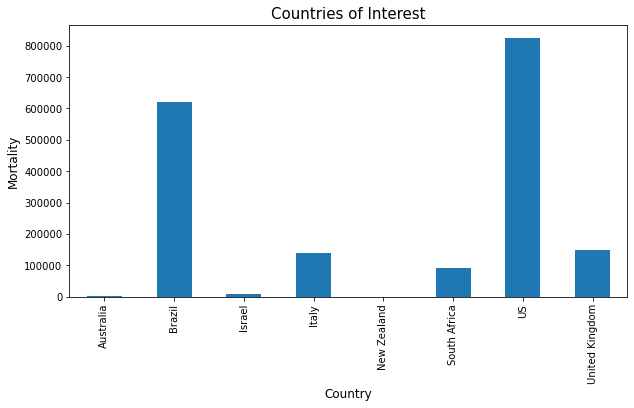

In [208]:
#   plot mortality for selected countries of interest using pandas
mortality = analysis_df.groupby(["Country/Region"]).max()["Deaths"]
Bar_Pandas = mortality.plot.bar(figsize=(10,5), rot=90)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Mortality", fontsize=12)
plt.title("Countries of Interest", fontsize=15)


Country/Region
Australia           2257
Brazil            619367
Israel              8244
Italy             137513
New Zealand           51
South Africa       91198
US                825816
United Kingdom    149251
Name: Deaths, dtype: int64

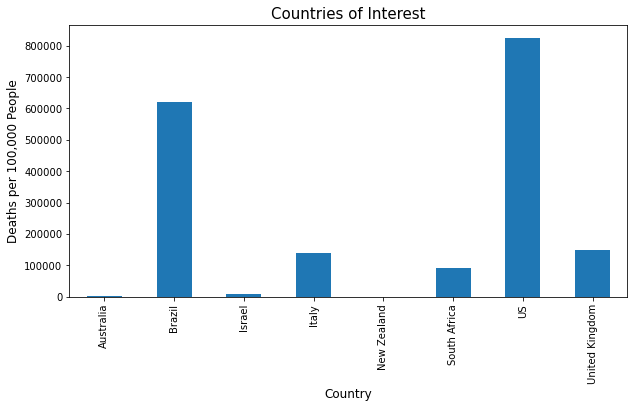

In [209]:
#   plot "deaths per 100,000 people" for selected countries of interest using pandas

Deaths_per_100k = analysis_df.groupby(["Country/Region"]).max()["Deaths_per_100k"]
Bar_Pandas = mortality.plot.bar(figsize=(10,5), rot=90)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Deaths per 100,000 People", fontsize=12)
plt.title("Countries of Interest", fontsize=15)
mortality


Country/Region
Australia           2257
Brazil            619367
Israel              8244
Italy             137513
New Zealand           51
South Africa       91198
US                825816
United Kingdom    149251
Name: Deaths, dtype: int64

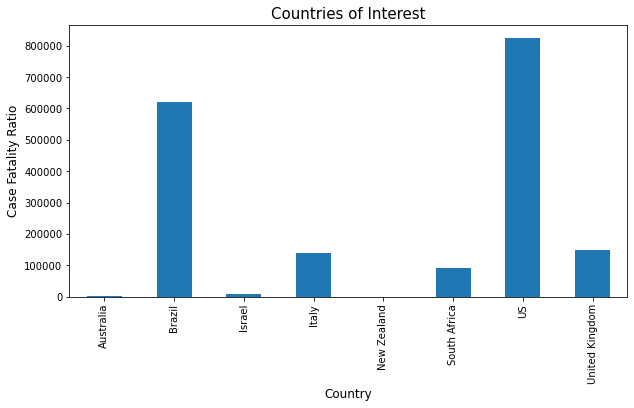

In [182]:
#   plot "case fatality ratio" for selected countries of interest using pandas

Case_Fatality = analysis_df.groupby(["Country/Region"]).max()["Case_Fatality"]
Bar_Pandas = mortality.plot.bar(figsize=(10,5), rot=90)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Case Fatality Ratio", fontsize=12)
plt.title("Countries of Interest", fontsize=15)
mortality

The r-square is -0.14636001746783117
y = -4.42x + 39.54


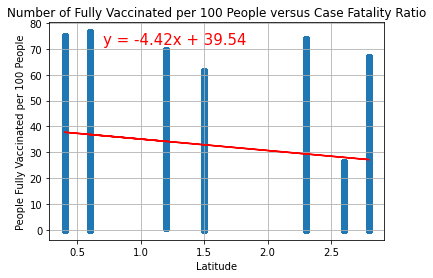

In [210]:
#   regression analysis: "Number of Fully Vaccinated per 100 People versus Case Fatality Ratio"

#   define the linear regression function
#variables are
# x_values: first set of data
# y_values: second set of data
# regEQplotX: where the linear regression equation appears on the plot x line
# regEQplotY: where the linear regression equasion appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

x_values = analysis_df["Case_Fatality"]
y_values = analysis_df["people_fully_vaccinated_per_hundred"]
#tweak where the equation appears on the plot
regEQplotX = 0.7
regEQplotY = 72
#label the axes
x_label = "Case Fatality Ratio"
y_label = "People Fully Vaccinated per 100 People"
#give the title
plt.title(f'Number of Fully Vaccinated per 100 People versus Case Fatality Ratio')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png
plt.savefig("Percentage of People Fully Vaccinated versus Case Fatality Ratio.png")
plt.show()  

The r-square is 0.04161246462830913
y = 0.01x + 31.54


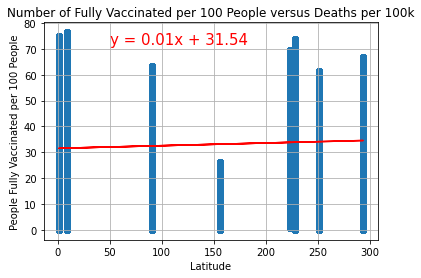

In [211]:
#   regression analysis: "Number of Fully Vaccinated per 100 People versus Deaths per 100k People"

#   define the linear regression function
#variables are
# x_values: first set of data
# y_values: second set of data
# regEQplotX: where the linear regression equation appears on the plot x line
# regEQplotY: where the linear regression equasion appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

x_values = analysis_df["Deaths_per_100k"]
y_values = analysis_df["people_fully_vaccinated_per_hundred"]
#tweak where the equation appears on the plot
regEQplotX = 50
regEQplotY = 72
#label the axes
x_label = "Deaths per 100k"
y_label = "People Fully Vaccinated per 100 People"
#give the title
plt.title(f'Number of Fully Vaccinated per 100 People versus Deaths per 100k')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png
plt.savefig("Percentage of People Fully Vaccinated versus Deaths per 100k.png")
plt.show()  

The r-square is nan
y = nanx + nan


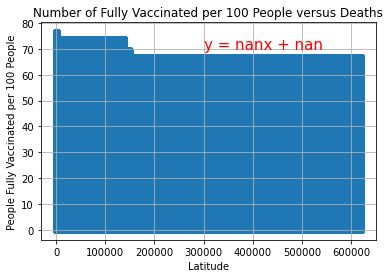

In [212]:
#   regression analysis: "Number of Fully Vaccinated per 100 People versus Deaths"   ***   ISSUES   ***

#   define the linear regression function
#variables are
# x_values: first set of data
# y_values: second set of data
# regEQplotX: where the linear regression equation appears on the plot x line
# regEQplotY: where the linear regression equasion appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

x_values = final_countries_df["Deaths"]
y_values = final_countries_df["people_fully_vaccinated_per_hundred"]
#tweak where the equation appears on the plot
regEQplotX = 300000
regEQplotY = 70
#label the axes
x_label = "Deaths"
y_label = "People Fully Vaccinated per 100 People"
#give the title
plt.title(f'Number of Fully Vaccinated per 100 People versus Deaths')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png
plt.savefig("Percentage of People Fully Vaccinated versus Deaths.png")
plt.show()  

The correlation between people fully vaccinated per hundred and deaths is -0.0


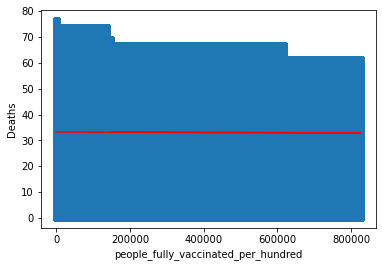

In [213]:
#   Calculate the correlation coefficient
#   for people_fully_vaccinated_per_hundred and deaths for selected countries
corr=round(st.pearsonr(analysis_df['Deaths'],analysis_df['people_fully_vaccinated_per_hundred'])[0],2)
print(f"The correlation between people fully vaccinated per hundred and deaths is {corr}")
model = st.linregress(analysis_df['Deaths'],analysis_df['people_fully_vaccinated_per_hundred'])

y_values = analysis_df['Deaths']*model[0]+model[1]
plt.scatter(analysis_df['Deaths'],analysis_df['people_fully_vaccinated_per_hundred'])
plt.plot(analysis_df['Deaths'],y_values,color="red")
plt.xlabel('people_fully_vaccinated_per_hundred')
plt.ylabel('Deaths')
plt.show()

#   the pearson's correlation coefficient 0f -0.00 indicates a negligible level of correlation
#   need  to check the p-value to determine significance

The correlation between people fully vaccinated per hundred and deaths is -0.15


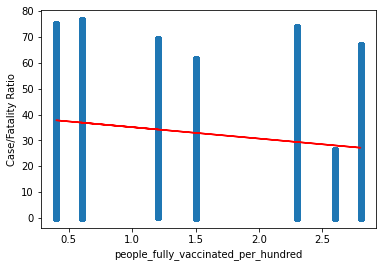

In [214]:
#   Calculate the correlation coefficient
#   for people_fully_vaccinated_per_hundred and case-fatality_ratio for selected countries
corr=round(st.pearsonr(analysis_df['Case_Fatality'],analysis_df['people_fully_vaccinated_per_hundred'])[0],2)
print(f"The correlation between people fully vaccinated per hundred and deaths is {corr}")
model = st.linregress(analysis_df['Case_Fatality'],analysis_df['people_fully_vaccinated_per_hundred'])

y_values = analysis_df['Case_Fatality']*model[0]+model[1]
plt.scatter(analysis_df['Case_Fatality'],analysis_df['people_fully_vaccinated_per_hundred'])
plt.plot(analysis_df['Case_Fatality'],y_values,color="red")
plt.xlabel('people_fully_vaccinated_per_hundred')
plt.ylabel('Case/Fatality Ratio')
plt.show()

#   the pearson's correlation coefficient 0f -0.15 indicates a negligible level of correlation
#   need  to check the t value and the p-value to determine significance

The correlation between people fully vaccinated per hundred and deaths is 0.04


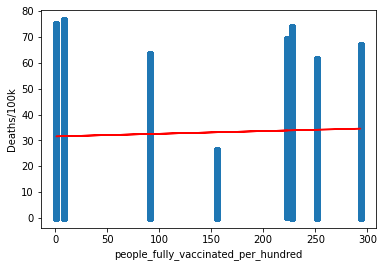

In [215]:
#   Calculate the correlation coefficient
#   for people_fully_vaccinated_per_hundred and deaths_per100k for selected countries
corr=round(st.pearsonr(analysis_df['Deaths_per_100k'],analysis_df['people_fully_vaccinated_per_hundred'])[0],2)
print(f"The correlation between people fully vaccinated per hundred and deaths is {corr}")
model = st.linregress(analysis_df['Deaths_per_100k'],analysis_df['people_fully_vaccinated_per_hundred'])

y_values = analysis_df['Deaths_per_100k']*model[0]+model[1]
plt.scatter(analysis_df['Deaths_per_100k'],analysis_df['people_fully_vaccinated_per_hundred'])
plt.plot(analysis_df['Deaths_per_100k'],y_values,color="red")
plt.xlabel('people_fully_vaccinated_per_hundred')
plt.ylabel('Deaths/100k')
plt.show()

#   the pearson's correlation coefficient 0f 0.04 indicates a negligible level of correlation
#   need  to check the p-value to determine significance

The correlation between people not vaccinated per hundred and deaths is 0.0


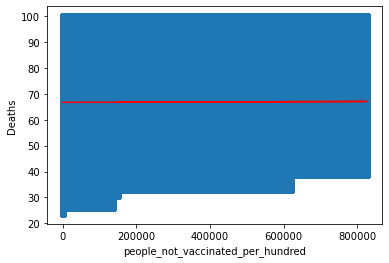

In [216]:
#   Calculate the correlation coefficient
#   for people_not_vaccinated_per_hundred and deaths for selected countries
corr=round(st.pearsonr(analysis_df['Deaths'],analysis_df['people_not_vaccinated_per_hundred'])[0],2)
print(f"The correlation between people not vaccinated per hundred and deaths is {corr}")
model = st.linregress(analysis_df['Deaths'],analysis_df['people_not_vaccinated_per_hundred'])

y_values = analysis_df['Deaths']*model[0]+model[1]
plt.scatter(analysis_df['Deaths'],analysis_df['people_not_vaccinated_per_hundred'])
plt.plot(analysis_df['Deaths'],y_values,color="red")
plt.xlabel('people_not_vaccinated_per_hundred')
plt.ylabel('Deaths')
plt.show()

#   the pearson's correlation coefficient 0f 0.05 indicates a negligible level of correlation
#   need  to check the p-value to determine significance

The correlation between people not vaccinated per hundred and case fatality ratio is 0.5


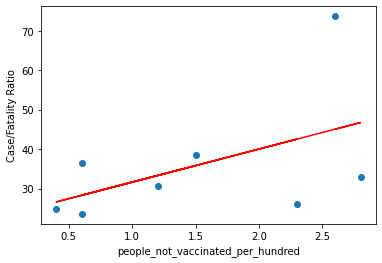

In [173]:
#   Calculate the correlation coefficient
#   for people_not_vaccinated_per_hundred and case_fatality_ratio for selected countries
corr=round(st.pearsonr(jhu_summary_df['Case/Fatality Ratio'],jhu_summary_df['people_not_vaccinated_per_hundred'])[0],2)
print(f"The correlation between people not vaccinated per hundred and case fatality ratio is {corr}")
model = st.linregress(jhu_summary_df['Case/Fatality Ratio'],jhu_summary_df['people_not_vaccinated_per_hundred'])

y_values = jhu_summary_df['Case/Fatality Ratio']*model[0]+model[1]
plt.scatter(jhu_summary_df['Case/Fatality Ratio'],jhu_summary_df['people_not_vaccinated_per_hundred'])
plt.plot(jhu_summary_df['Case/Fatality Ratio'],y_values,color="red")
plt.xlabel('people_not_vaccinated_per_hundred')
plt.ylabel('Case/Fatality Ratio')
plt.show()

#   the pearson's correlation coefficient 0f 0.05 indicates a negligible level of correlation
#   need  to check the p-value to determine significance

The correlation between people not vaccinated per hundred and deaths per 100k is 0.18


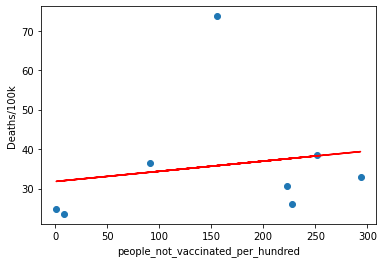

In [217]:
#   Calculate the correlation coefficient
#   for people_not_vaccinated_per_hundred and deaths_per_100k for selected countries
corr=round(st.pearsonr(jhu_summary_df['Deaths/100k'],jhu_summary_df['people_not_vaccinated_per_hundred'])[0],2)
print(f"The correlation between people not vaccinated per hundred and deaths per 100k is {corr}")
model = st.linregress(jhu_summary_df['Deaths/100k'],jhu_summary_df['people_not_vaccinated_per_hundred'])

y_values = jhu_summary_df['Deaths/100k']*model[0]+model[1]
plt.scatter(jhu_summary_df['Deaths/100k'],jhu_summary_df['people_not_vaccinated_per_hundred'])
plt.plot(jhu_summary_df['Deaths/100k'],y_values,color="red")
plt.xlabel('people_not_vaccinated_per_hundred')
plt.ylabel('Deaths/100k')
plt.show()

#   the pearson's correlation coefficient 0f -0.18 indicates a negligible level of correlation
#   need  to check the p-value to determine significance